In [1]:
import roboticstoolbox as rp
import numpy as np
from roboticstoolbox.tools import URDF, xacro
import time
# plotting the polytope
import matplotlib.pyplot as plt

### Panda robot initialisation

In [2]:
panda = rp.models.DH.Panda()
# inital
q0= np.array([0.00 , 0, 0,   -1.6, -6.64181e-05,    1.56995,0])
panda.q = q0

### Defining joint and cartesian space limits

In [3]:

# joint space limits
q_min, q_max  = panda.qlim
dq_max = rp.models.URDF.Panda().qdlim[:-2]
dq_min = -dq_max
t_max = np.array([87, 87, 87, 87, 20, 20, 20]) 
t_min = -t_max

# cartesian space limits
ddx_max = np.array([13.0,13,13])
ddx_min = -ddx_max
dx_max = np.array([1.7,1.7,1.7])
dx_min = -dx_max


### Reachable space parameters

In [4]:
# object mass
m_o = 0
# prediction horizon
delta_t = 0.15

## Interactive comparison of the polytope $P_x$ and the cartesain cube $C_x$

<IPython.core.display.Javascript object>


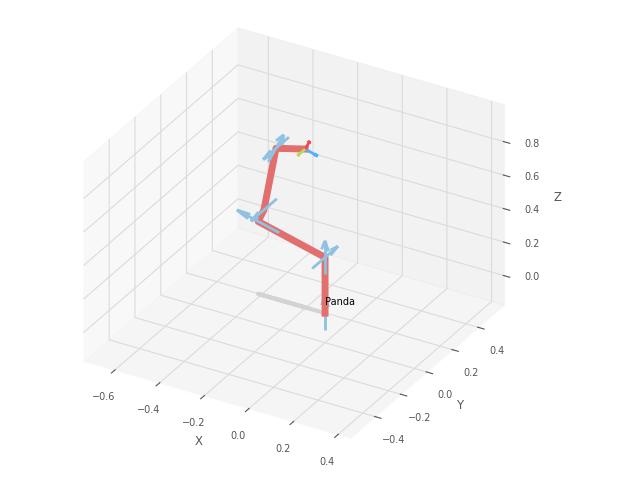

In [7]:
# utilities imports
from reachability_utils import reachable_set_polytope, reachable_set_cube, robot_simulation
from interactive_utils import RobotSlider 

# pycapacity visualisation tools
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex 


%matplotlib notebook

env = panda.plot(panda.q)
ax = env.ax

def update():
    # polytope P_x calculation
    vertex_Px, faces_Px, t_vert_Px, H_Px, d_Px = reachable_set_polytope(panda, panda.q, q_max,q_min,dq_max,dq_min,t_max,t_min,delta_t,m_o)

    # cube C_x calculation
    vertex_Cx, faces_Cx, H_Cx, d_Cx = reachable_set_cube(panda, panda.q, dx_min, dx_max, ddx_min, ddx_max, delta_t, m_o)
    
    env = panda.plot(panda.q)
    ax = env.ax

    # draw faces and vertices
    plot_polytope_vertex(ax=ax, vertex=vertex_Px, label='polytope $P_x$',color='blue')
    plot_polytope_faces(ax=ax, faces=faces_Px, face_color='blue', edge_color='blue', alpha=0.2)

    # draw faces and vertices
    plot_polytope_vertex(ax=ax, vertex=vertex_Cx, label='cube $C_x$',color='orange')
    plot_polytope_faces(ax=ax, faces=faces_Cx, face_color='orange', edge_color='orange', alpha=0.2)

    plt.tight_layout()
    plt.legend()
    #ax.set_xlim([-1, 1.5])
    #ax.set_ylim([-1, 1.5])
    #ax.set_zlim([0, 1.5])
    env.step()

app = RobotSlider(panda, env, update)

## Interactive comparison of the polytepe $P_x$ and the simulated robot trajectories $x \in X$

<IPython.core.display.Javascript object>


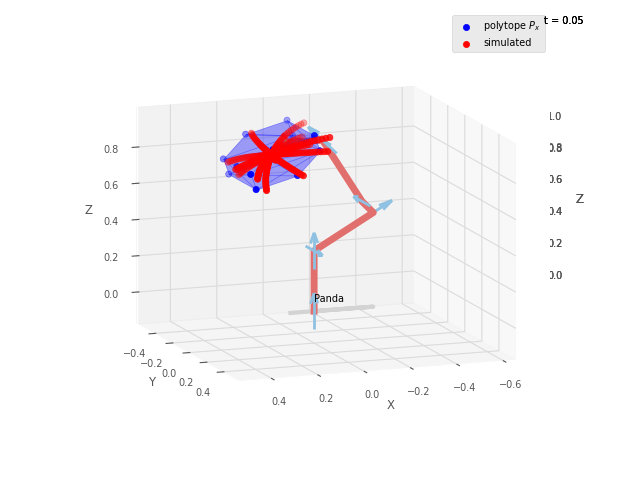

polytope P_x calculation time: 0.021377086639404297 sec
robot simulation time: 2.7427873611450195 sec
polytope P_x calculation time: 0.024491310119628906 sec
robot simulation time: 2.7424962520599365 sec
polytope P_x calculation time: 0.010503053665161133 sec
robot simulation time: 2.707010269165039 sec


In [9]:
# utilities imports
from reachability_utils import reachable_set_polytope, reachable_set_cube, robot_simulation
from interactive_utils import RobotSlider 

# pycapacity visualisation tools
from pycapacity.visual import plot_polytope_faces, plot_polytope_vertex 

%matplotlib notebook

env = panda.plot(panda.q)
ax = env.ax

def update():
    # polytope P_x calculation
    vertex_Px, faces_Px, t_vert_Px, H_Px, d_Px = reachable_set_polytope(panda, panda.q, q_max,q_min,dq_max,dq_min,t_max,t_min,delta_t,m_o)

    # robot simulation
    x_robot = robot_simulation(panda, panda.q, t_vert_Px.T, q_max,q_min,dq_max,dq_min,t_max,t_min,delta_t,m_o)
    
    env = panda.plot(panda.q)
    ax = env.ax

    # draw faces and vertices
    plot_polytope_vertex(ax=ax, vertex=vertex_Px, label='polytope $P_x$',color='blue')
    plot_polytope_faces(ax=ax, faces=faces_Px, face_color='blue', edge_color='blue', alpha=0.2)

    # drawing the simulated points
    plot_polytope_vertex(ax=ax, vertex=x_robot.T, color='red', label='simulated')

    plt.tight_layout()
    plt.legend()
    #ax.set_xlim([-1, 1.5])
    #ax.set_ylim([-1, 1.5])
    #ax.set_zlim([0, 1.5])
    env.step()

app = RobotSlider(panda, env, update)